**Project Objective:**<br>
    1. To analyze the customers who have stopped buying credit card.<br>
    2. To improve credit card business of bank.

In [15]:
#import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#to read data to data frame from csv file
data=pd.read_csv(r"DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv")
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [16]:
#to get count of rows and columns in data
data.shape

(10127, 20)

In [17]:
#to get information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [18]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Region', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

# Identify missing values in the dataset & display the count of Missing values

In [19]:
#to check null values
data.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

# Perform Data Imputation

In [20]:
#to replace null values with mode and mean
data['Card_Category']=data['Card_Category'].fillna(data['Card_Category'].mode()[0],inplace=True)
data['Credit_Limit']=data['Credit_Limit'].fillna(data['Credit_Limit'].median(),inplace=True)

In [22]:
#checking for null values
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

Data has no null values

### columns of categorial data type

In [27]:
cat=[]
for i in data.columns:
    if data[i].nunique()<=30 :
        cat.append(i)
print("Columns that are Categorical data type are:",cat)

Columns that are Categorical data type are: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Region', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']


### columns of Numeric data type

In [38]:
# using fun_con function we find Columns that are Numeric data type.
con=[]
con1=data.drop(cat,axis=1) 
con.append(con1.columns)
con
#con list is created,having Numeric data type

[Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
       dtype='object')]

In [71]:
#dataframe of cat
data_cat=data.loc[:,cat]

#dataframe of col
data_col=data.drop(cat,axis=1)

# categorial columns

In [60]:
def fun_cate1(col):
    if data_cat[col].isnull().sum()>0:
        data_cat[col].fillna(data_cat[col].mode()[0],inplace=True)
    print(f"{col}:Number of category is {data_cat[col].unique()}")
    
    print(f"{col}:Missing Value is {data_cat[col].isnull().sum()}")
    print("\n")

In [61]:
for col in data_cat.columns:
    fun_cate1(col)

Attrition_Flag:Number of category is ['Existing Customer' 'Attrited Customer']
Attrition_Flag:Missing Value is 0


Gender:Number of category is ['M' 'F']
Gender:Missing Value is 0


Education_Level:Number of category is ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Education_Level:Missing Value is 0


Marital_Status:Number of category is ['Married' 'Single' 'Unknown' 'Divorced']
Marital_Status:Missing Value is 0


Income_Category:Number of category is ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Income_Category:Missing Value is 0


Card_Category:Number of category is ['Blue' 'Gold' 'Silver' 'Platinum']
Card_Category:Missing Value is 0


Region:Number of category is ['England' 'Northern Ireland' 'Wales' 'Scotland']
Region:Missing Value is 0


Total_Relationship_Count:Number of category is [5 6 4 3 2 1]
Total_Relationship_Count:Missing Value is 0


Months_Inactive_12_mon:Number of category is [1 4 2 3 6 0 5]

# Summary statistics of Continues columns  

In [76]:
#To replace missing values of Continues columns with mean value
def fun_num(i):
    if data_col[i].isnull().sum()>0:
        data_col[i].fillna(data_col[i].mean(),inplace=True)
    
    print(f"{i}:Missing Value is {data_col[i].isnull().sum()}")
    print(f"{i}:Mean is {data_col[i].mean()}")
    print(f"{i}:Median is {data_col[i].median()}")
    print(f"{i}:Mode is {data_col[i].mode()[0]}")
    print(f"{i}:Standard Deviation is {data_col[i].std()}")
    print(f"{i}:Variance is {data_col[i].var()}")
    print(f"{i}:COV is {data_col[i].std()/data_col[i].mean()*100}")
    print("\n")

In [77]:
for i in data_col.columns:
    fun_num(i)   

CLIENTNUM:Missing Value is 0
CLIENTNUM:Mean is 739177606.3336625
CLIENTNUM:Median is 717926358.0
CLIENTNUM:Mode is 708082083
CLIENTNUM:Standard Deviation is 36903783.45023111
CLIENTNUM:Variance is 1361889232941551.5
CLIENTNUM:COV is 4.992546193772658


Customer_Age:Missing Value is 0
Customer_Age:Mean is 46.382245482373854
Customer_Age:Median is 46.0
Customer_Age:Mode is 44
Customer_Age:Standard Deviation is 8.341393132886584
Customer_Age:Variance is 69.57883939736746
Customer_Age:COV is 17.984021787079012


Dependent_count:Missing Value is 0
Dependent_count:Mean is 2.7874000197491853
Dependent_count:Median is 2.0
Dependent_count:Mode is 3
Dependent_count:Standard Deviation is 6.479134929706418
Dependent_count:Variance is 41.97918943734179
Dependent_count:COV is 232.44367094068616


Months_on_book:Missing Value is 0
Months_on_book:Mean is 35.928409203120374
Months_on_book:Median is 36.0
Months_on_book:Mode is 36
Months_on_book:Standard Deviation is 7.986416330871776
Months_on_book:Vari

# Identify the Outliers in the dataset

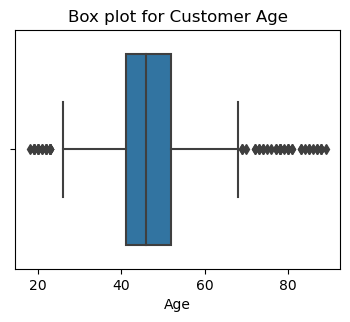

In [45]:
#Customer_Age
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Customer_Age'])
plt.title("Box plot for Customer Age")
plt.xlabel("Age")
plt.show()

**Observation:**<br>
    Age has outliers.

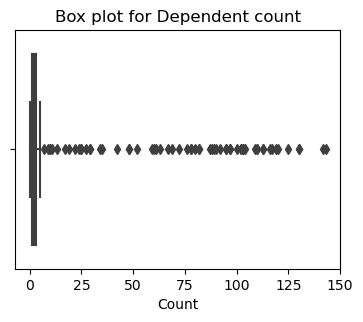

In [47]:
#Dependent_count
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Dependent_count'])
plt.title("Box plot for Dependent count")
plt.xlabel("Count")
plt.show()

**Observation:**<br>
    Dependent count has outliers.

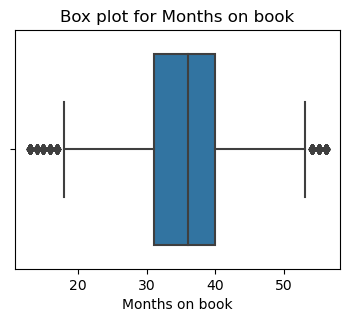

In [48]:
#Months_on_book
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Months_on_book'])
plt.title("Box plot for Months on book")
plt.xlabel("Months on book")
plt.show()

**Observation:**<br>
    Months on book has outliers.

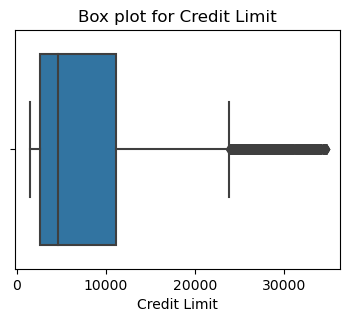

In [49]:
#Credit_Limit
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Credit_Limit'])
plt.title("Box plot for Credit Limit")
plt.xlabel("Credit Limit")
plt.show()

**Observation:**<br>
    Credit Limit has outliers.

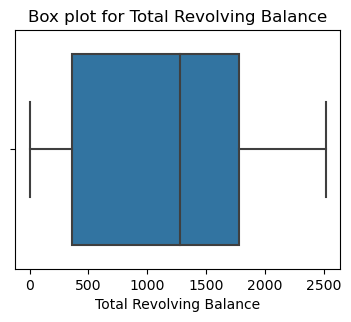

In [50]:
#Total_Revolving_Bal
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Total_Revolving_Bal'])
plt.title("Box plot for Total Revolving Balance")
plt.xlabel("Total Revolving Balance")
plt.show()

**Observation:**<br>
    Total Revolving Balance has no outliers.

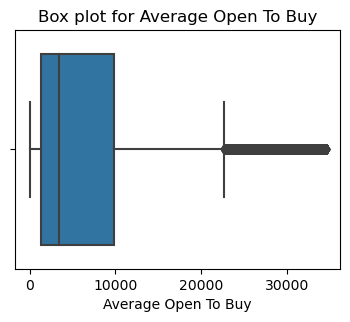

In [51]:
#Avg_Open_To_Buy
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Avg_Open_To_Buy'])
plt.title("Box plot for Average Open To Buy")
plt.xlabel("Average Open To Buy")
plt.show()

**Observation:**<br>
    Avg_Open_To_Buy has outliers.

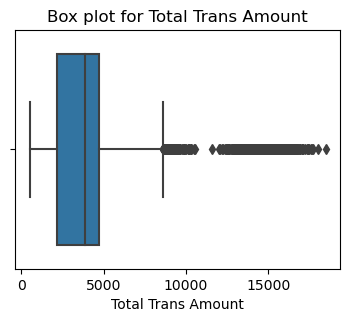

In [53]:
#Total_Trans_Amt
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Total_Trans_Amt'])
plt.title("Box plot for Total Trans Amount")
plt.xlabel("Total Trans Amount")
plt.show()

**Observation:**<br>
    Total Trans Amount has outliers.

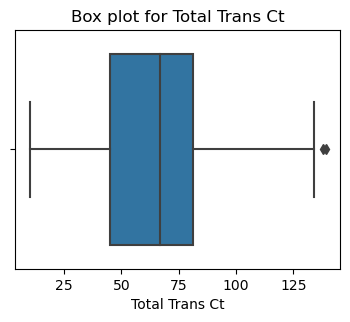

In [55]:
#Total_Trans_Ct
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Total_Trans_Ct'])
plt.title("Box plot for Total Trans Ct")
plt.xlabel("Total Trans Ct")
plt.show()

**Observation:**<br>
    Total_Trans_Ct has outliers.

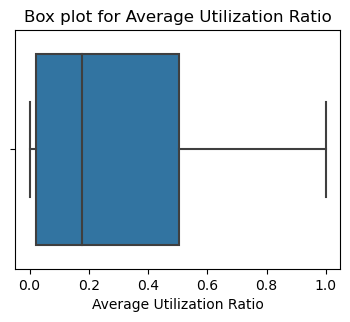

In [57]:
#Avg_Utilization_Ratio
plt.figure(figsize=(4.2,3.1))
sb.boxplot(x=data['Avg_Utilization_Ratio'])
plt.title("Box plot for Average Utilization Ratio")
plt.xlabel("Average Utilization Ratio")
plt.show()

**Observation:**<br>
    Avg_Utilization_Ratio has no outliers.

**Observation**<br>
Total Revolving Balance & Avg_Utilization_Ratio has no outliers.<br>
Dependent_count,Months_on_book,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct has outliers

data to be loaded to tableau

In [79]:
data.to_csv("Capstone_project_data.csv")